In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.6f}'.format  

# 그래프에서 한글 깨짐 방지
import platform
if platform.system() == "Darwin":          # MAC인 경우
    plt.rc('font', family ="AppleGothic")
else:
    plt.rc('font',family='Malgun Gothic')

#멧플로립에서 음수를 표시
plt.rc('axes',unicode_minus=False)

#워닝 메시지
import warnings
warnings.filterwarnings('ignore')


In [7]:
df=pd.read_csv('./datasets/원본data.csv',index_col=0)

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import LSTM, Dense


In [27]:
scaler_X = StandardScaler()
scaled_data_X = scaler_X.fit_transform(df.iloc[:, :-1])
# 종가 데이터 가져오기 & 스케일링
scaler_y = StandardScaler()
scaled_data_y = scaler_y.fit_transform(df.iloc[:, -1].values.reshape(-1,1))
# 종가 제외한 나머지 데이터 가져오기
X = scaled_data_X
y = scaled_data_y
# train, test 분리 (비율은 상황에 따라 조정)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=False)

# LSTM에 맞는 형태로 변경
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# LSTM 모델 생성
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
# 모델 학습
model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)
# 예측
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# 예측 값 스케일 역변환
train_predict = scaler_y.inverse_transform(train_predict)
test_predict = scaler_y.inverse_transform(test_predict)
# 실제 값 스케일 역변환
y_train = scaler_y.inverse_transform(y_train.reshape(-1,1))
y_test = scaler_y.inverse_transform(y_test.reshape(-1,1))


Epoch 1/100
2/2 [==============================] - 3s 41ms/step - loss: 1.2720
Epoch 2/100
2/2 [==============================] - 0s 44ms/step - loss: 1.2493
Epoch 3/100
2/2 [==============================] - 0s 41ms/step - loss: 1.2216
Epoch 4/100
2/2 [==============================] - 0s 43ms/step - loss: 1.2000
Epoch 5/100
2/2 [==============================] - 0s 39ms/step - loss: 1.1761
Epoch 6/100
2/2 [==============================] - 0s 41ms/step - loss: 1.1467
Epoch 7/100
2/2 [==============================] - 0s 38ms/step - loss: 1.1202
Epoch 8/100
2/2 [==============================] - 0s 40ms/step - loss: 1.0836
Epoch 9/100
2/2 [==============================] - 0s 40ms/step - loss: 1.0354
Epoch 10/100
2/2 [==============================] - 0s 39ms/step - loss: 0.9707
Epoch 11/100
2/2 [==============================] - 0s 40ms/step - loss: 0.9002
Epoch 12/100
2/2 [==============================] - 0s 39ms/step - loss: 0.8059
Epoch 13/100
2/2 [==============================]

In [34]:
df.index[:123]

Index(['2008-01', '2008-02', '2008-03', '2008-04', '2008-05', '2008-06',
       '2008-07', '2008-08', '2008-09', '2008-10',
       ...
       '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11',
       '2017-12', '2018-01', '2018-02', '2018-03'],
      dtype='object', name='Date', length=123)

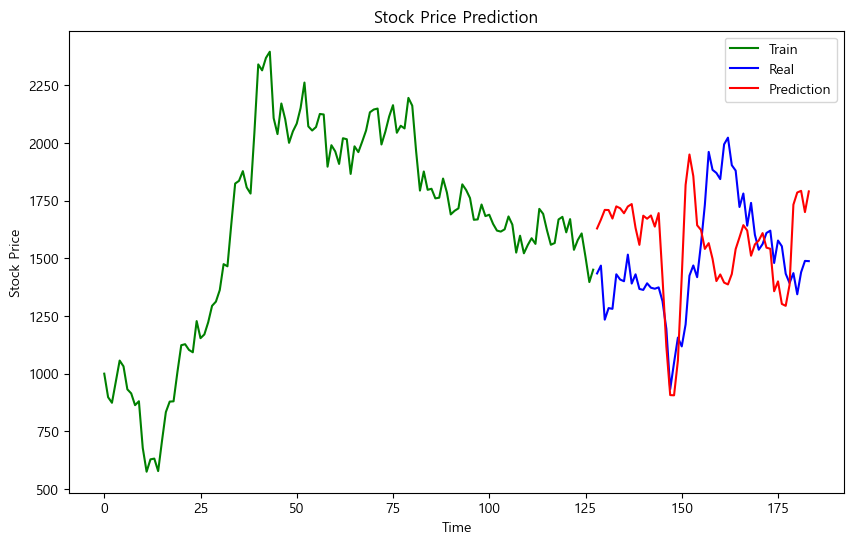

In [36]:
plt.figure(figsize=(10,6))
# Add the training set to the plot:
plt.plot(y_train, color='green', label='Train')
# Plot the test and prediction data:
plt.plot(range(len(y_train), len(y_train)+len(y_test)), y_test, color='blue', label='Real')
plt.plot(range(len(y_train), len(y_train)+len(y_test)), test_predict[:,0], color='red', label='Prediction')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

#############

In [22]:
import tensorflow as tf

148

In [54]:
dataset =df.values
data_mean = dataset[:148].mean(axis=0)
data_std = dataset[:148].std(axis=0)
dataset = (dataset-data_mean)/data_std
print(dataset)

[[ 0.94780259  1.47705203 -0.64356469 ... -0.68147063 -1.81293319
  -1.40052218]
 [ 0.81096128  1.465743   -0.65612702 ... -0.44881218 -1.58430981
  -1.63853557]
 [ 0.72388044  1.29610743 -0.65612702 ...  0.01822176 -1.28218507
  -1.69487217]
 ...
 [-1.68950266 -0.89784591  0.4116709  ...  0.50886495  2.75013314
  -0.37528936]
 [-1.72682302 -0.89784591 -0.32950648 ...  0.10207038  2.37707106
  -0.26067996]
 [-1.77658349 -0.76213745 -0.26669484 ...  0.56781654  2.9898672
  -0.26291942]]


In [55]:
def multivariate_data(dataset, target, start_index, end_index, history_size, target_size, step, single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i - history_size, i, step)
        data.append(dataset[indices])

        if single_step:
            labels.append(target[i + target_size])
        else:
            labels.append(target[i:i + target_size])
    return np.array(data), np.array(labels)

- dataset: 입력으로 사용될 다변량 시계열 데이터. 이는 2D 배열 또는 리스트로 표현됩니다.
- target: 예측하고자 하는 값 또는 시계열 데이터의 특정 특징(feature). 이는 1D 배열 또는 리스트로 표현됩니다.
- start_index: 데이터에서 입력 시퀀스의 시작 인덱스입니다.
- end_index: 데이터에서 입력 시퀀스의 종료 인덱스입니다. 만약 None으로 설정되면, 데이터의 끝에서 target_size를 뺀 값으로 설정됩니다.
- history_size: 입력으로 사용할 이전 시점들의 크기입니다. 이 값은 현재 시점을 포함하지 않습니다.
- target_size: 예측하고자 하는 미래 시점들의 크기입니다.
- step: 입력 시퀀스를 만들기 위해 사용할 간격(step)입니다.
- single_step: 예측할 시계열 데이터가 단일 시점인지 여부를 나타냅니다. 기본값은 False이며, 다변량 시계열을 예측하는 경우 False로 설정되어야 합니다.

In [56]:
past_history = 6
future_target = 1
STEP = 1

X_train, y_train = multivariate_data(dataset, dataset[:, -1], 0, 148, past_history,
                                                   future_target, STEP, single_step=False)
X_test, y_test = multivariate_data(dataset, dataset[:, -1], 148, None, past_history,
                                               future_target, STEP, single_step=False)

print('Single window of past history : {}'.format(X_train[0].shape))

Single window of past history : (6, 22)


In [57]:
X_train.shape

(142, 6, 22)

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# LSTM 모델 생성
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 학습
model.fit(X_train, y_train, epochs=200, batch_size=64, verbose=1)

# 예측
train_predict = model.predict(X_train)
val_predict = model.predict(X_test)

# 예측 값 스케일 역변환
train_predict = scaler_y.inverse_transform(train_predict)
val_predict = scaler_y.inverse_transform(val_predict)

# 실제 값 스케일 역변환
y_train = scaler_y.inverse_transform(y_train.reshape(-1,1))
y_test = scaler_y.inverse_transform(y_test.reshape(-1,1))


Epoch 1/200
3/3 [==============================] - 3s 11ms/step - loss: 0.8284
Epoch 2/200
3/3 [==============================] - 0s 11ms/step - loss: 0.3796
Epoch 3/200
3/3 [==============================] - 0s 11ms/step - loss: 0.1588
Epoch 4/200
3/3 [==============================] - 0s 11ms/step - loss: 0.1199
Epoch 5/200
3/3 [==============================] - 0s 11ms/step - loss: 0.1275
Epoch 6/200
3/3 [==============================] - 0s 11ms/step - loss: 0.0851
Epoch 7/200
3/3 [==============================] - 0s 11ms/step - loss: 0.0644
Epoch 8/200
3/3 [==============================] - 0s 11ms/step - loss: 0.0721
Epoch 9/200
3/3 [==============================] - 0s 10ms/step - loss: 0.0755
Epoch 10/200
3/3 [==============================] - 0s 11ms/step - loss: 0.0674
Epoch 11/200
3/3 [==============================] - 0s 11ms/step - loss: 0.0559
Epoch 12/200
3/3 [==============================] - 0s 10ms/step - loss: 0.0515
Epoch 13/200
3/3 [==============================]

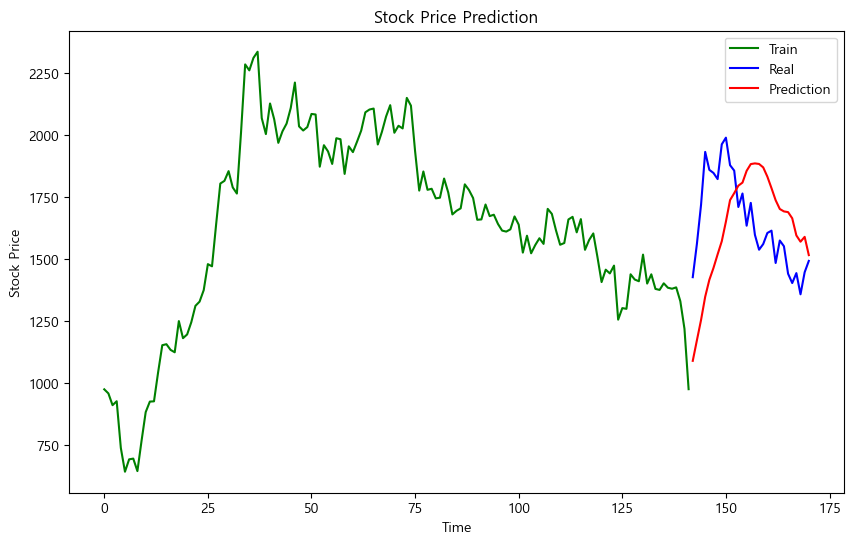

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
# Add the training set to the plot:
plt.plot(y_train, color='green', label='Train')
# Plot the test and prediction data:
plt.plot(range(len(y_train), len(y_train)+len(y_test)), y_test, color='blue', label='Real')
plt.plot(range(len(y_train), len(y_train)+len(y_test)), val_predict, color='red', label='Prediction')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
